In [1]:
import torch
import torchvision as tv
import matplotlib.pyplot as plt
import numpy as np

import json

In [2]:
with open("config.json") as f:
    cfg = json.load(f)

print(cfg)
fc = tv.datasets.FlyingChairs(cfg["flying_chairs"])

{'flying_chairs': 'C:\\Datasets', 'flying_things_3d': 'C:\\Datasets', 'sintel': 'C:\\Datasets'}


In [3]:
fc

Dataset FlyingChairs
    Number of datapoints: 22232
    Root location: C:\Datasets

In [4]:
im1, im2, flow = fc[0]
  # these are what we get out of the dataset

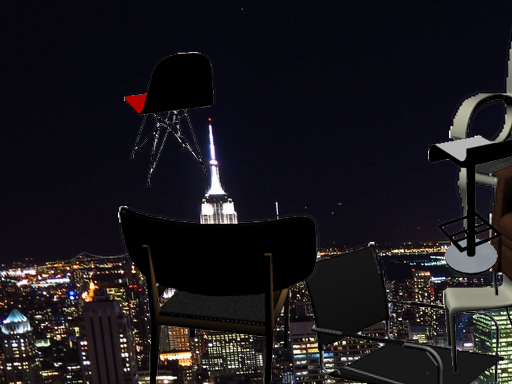

In [5]:
im1

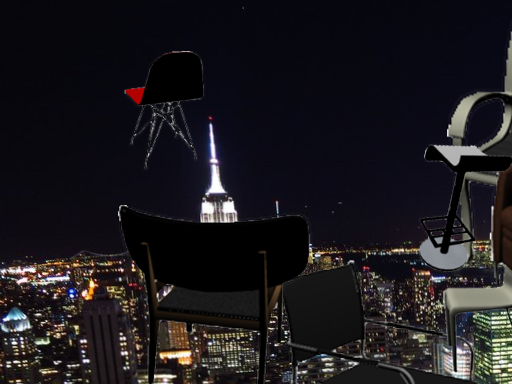

In [6]:
im2

In [7]:
flow.shape

(2, 384, 512)

(384, 512, 3)


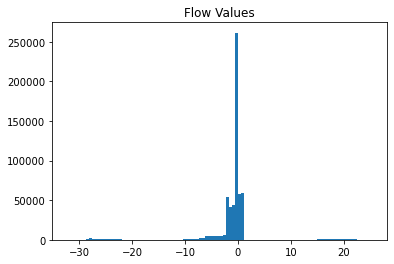

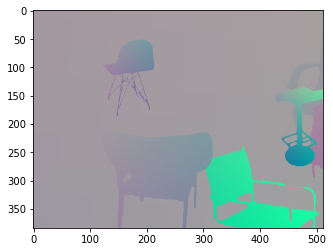

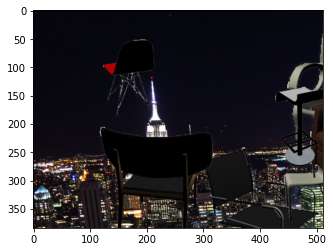

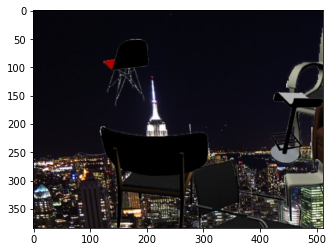

In [18]:
# for visualizing flow, add a dummy dimension for the third rgb channel
def display_flow(flow):
    flow_im = np.concatenate([flow, np.zeros((1, *flow.shape[1:]))], axis=0)
    flow_im = np.transpose(flow_im, (1, 2, 0))
    print(flow_im.shape)

    
    plt.hist(flow_im.flatten(), bins=100)  # for visualizing the distribution of values, just for troubleshooting
    plt.title("Flow Values")
    plt.show()
    
    xdim, ydim, _ = flow_im.shape
    # normalize horizontal and vertical flows by their respective image dimensions
    flow_im[:, :, 0] = flow_im[:, :, 0] / xdim
    flow_im[:, :, 1] = flow_im[:, :, 1] / ydim

    # normalize to between one and 0 for image display, this is NOT to be done with the training data
    flow_im -= flow_im.min()
    flow_im /= flow_im.max()

    
    plt.imshow(flow_im)
    plt.show()
    
im1, im2, flow = fc[0]
display_flow(flow)
plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

(384, 512, 3)


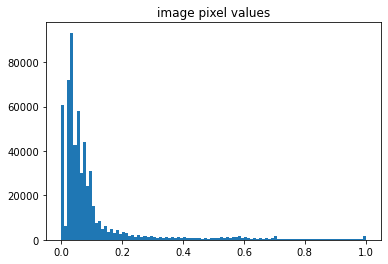

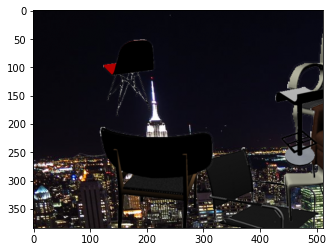

In [9]:
# for extracting the input images, converting them to numpy arrays and normalizing their values
b = np.array(im1.getdata())
b = b.reshape([im1.size[1], im1.size[0], 3])
# b = np.transpose(b, (1,2,0))
b = b.astype(int)
b = b/255
print(b.shape)
plt.hist(b.flatten(), bins=100)
plt.title("image pixel values")
plt.show()
plt.imshow(b)
plt.show()

In [16]:
from utils import load_model
model, info = load_model("flownetT-first")

torch.Size([2, 384, 512])
tensor([[[-32.9636, -32.9636, -34.4611,  ..., -16.0617,  -7.9413,  -7.9413],
         [-32.9636, -32.9636, -34.4611,  ..., -16.0617,  -7.9413,  -7.9413],
         [-35.3265, -35.3265, -36.8894,  ..., -19.1311, -10.6051, -10.6051],
         ...,
         [  4.4219,   4.4219,   4.1235,  ...,  13.7670,  13.4199,  13.4199],
         [  3.5711,   3.5711,   3.1766,  ...,  12.4273,  11.9493,  11.9493],
         [  3.5711,   3.5711,   3.1766,  ...,  12.4273,  11.9493,  11.9493]],

        [[100.3632, 100.3632, 106.0087,  ..., 116.0549, 100.8982, 100.8982],
         [100.3632, 100.3632, 106.0087,  ..., 116.0549, 100.8982, 100.8982],
         [105.1349, 105.1349, 111.3303,  ..., 125.1332, 109.0336, 109.0336],
         ...,
         [ 40.6356,  40.6356,  45.8166,  ...,  19.1111,  16.4814,  16.4814],
         [ 36.8722,  36.8722,  41.7524,  ...,  17.2525,  14.8028,  14.8028],
         [ 36.8722,  36.8722,  41.7524,  ...,  17.2525,  14.8028,  14.8028]]],
       grad_fn=<Sq

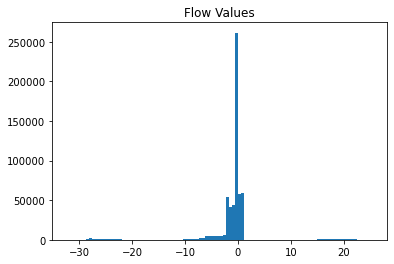

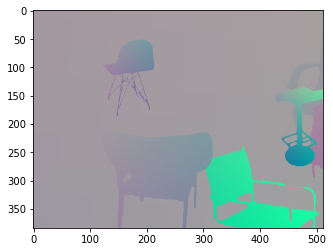

(384, 512, 3)


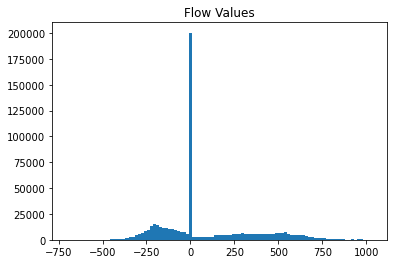

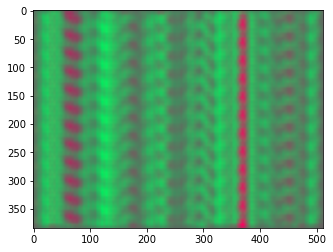

In [27]:
from datasets import flying_chairs, sintel
# fc_new = sintel(interpolate=True)
fc_new = flying_chairs()
x, label = fc_new[0]
print(label.size())
predict = model(x[None, :, :, :]).squeeze()
print(predict)
print(predict.max())
# predict[0, :, :] = predict[0, :, :]*
# predict[1, :, :] = predict[1, :, :]*512
label[0, :, :] = label[0, :, :] * 384
label[1, :, :] = label[1, :, :] * 512
flow = predict.detach().numpy()
display_flow(label)
display_flow(flow)

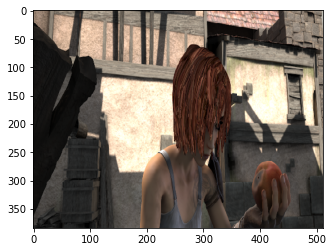

In [12]:
im = np.transpose(x.numpy()[:3, :, :], (1,2,0))
plt.imshow(im)
plt.show()